In [2]:
import sys
sys.path.append('../src')

In [3]:
import glob
import ete3
import pandas as pd
import os
import time
import json
import AFDB_tools, treescore , foldseek2tree , corecut
import colour
import numpy as np
import toytree
from matplotlib import pyplot as plt
from Bio import SeqIO
import toytree
import toyplot.svg

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
outfolder = '../examples/rrnpp_final/'

In [6]:
try:
    os.mkdir(outfolder +'structs/')
except:
    print('already exists')

#load the identifiers
with open(outfolder + 'identifiers.txt') as handle:
    identifiers = [ l.strip() for l in handle ]
notfound = [ AFDB_tools.grab_struct(uniID, outfolder+'structs/')  for uniID in identifiers ]
notfound = [ i for i in notfound if i]
with open(outfolder+'unmapped.txt', 'w') as simout:
    simout.write(json.dumps(notfound))


already exists
Q5WC62
Q5WBC1
Q5WBM7
Q5WBC1
Q5WBV2
A0A060LTA2
A0A060LT68
A0A060M1P9
A0A060LXZ4
A0A060M7R1
A0A060LST4
A0A060M707
A0A060M7H6
A0A0T6BSE8
A0A291KW88
A0A1C3SE68
A0A1C3SHV4
A0A0T6BQE4
A0A0T6BTL7
A0A291KK33
A0A0J6EG35
A0A0T6BPN4
A0A0T6BJL1
A0A1C3SAM2
A0A0J6EBB4
A0A0M5JM86
A0A0M5JM41
A0A0M4FS88
A0A0M3RAQ7
A0A8G1J9J6
structure not found A0A8G1J9J6
A8FF04
A8FIQ8
A8FIS5
A8FC49
A8FC58
A8FCC6
A8FDL3
A8FCC6
A0A8U0I9E3
structure not found A0A8U0I9E3
A0A8U0I987
structure not found A0A8U0I987
A0A8U0I6F7
structure not found A0A8U0I6F7
A0A5C0WME3
A0A5C0WCZ0
A0A5C0WEH4
A0A1L6ZEG5
A0A1L6ZIK7
A0A5C0WCZ0
A0A5K1KRS0
A0A5K1KVV2
Q6EZI3
A0A6L8P236
A0A6H3ABQ7
A0A5B8PT60
A0A5P9Y049
A0A2H2WIM5
A0A7D3Y3L0
A0A0E1MKG4
A0A5P9Y049
A0A2K8U1H8
A0A6I7EEE1
A0A158RUN4
A0A158RJR9
C2NVB0
C2P4I8
C2P7P3
C2Z018
B7HXS4
B7HZ83
B7JU66
B7JCU9
Q74NU6
Q735S3
Q733Y4
Q81AP3
Q81E45
Q81H01
B7H8P5
C2SX62
C2SN31
C2SUH0
C2SDR3
C2SDR3
D8GX91
D8H6E1
Q631L1
C2XMV1
C2X867
C2XKZ3
C2XMT9
B7IR85
B7IZ99
B7IKA1
C2MH55
C2MNK1
C2R4H1
B9J6

In [7]:
t, alnres = foldseek2tree.structblob2tree(outfolder + 'structs/',outfolder )

found foldseek output, skipping foldseek
             query      target  fident  alnlen  mismatch  gapopen  qstart  \
0       A0A6M8D843  A0A6M8D843   1.000     383         0        0       1   
1       A0A6M8D843  A0A0K0QCL2   0.906     383        36        0       1   
2       A0A6M8D843      B7IY66   0.932     383        26        0       1   
3       A0A6M8D843      K0FM26   0.788     383        81        0       1   
4       A0A6M8D843  A0A5C1FEK2   0.785     383        82        0       1   
...            ...         ...     ...     ...       ...      ...     ...   
589679  A0A3Q9HPK8  A0A7H8V064   0.108     250       167       12       1   
589680  A0A3Q9HPK8  A0A0X8GYF8   0.112     257       180       11      59   
589681  A0A3Q9HPK8  A0A0Z8EDW7   0.108     250       167       11       1   
589682  A0A3Q9HPK8  A0A2X3SEZ5   0.115     268       172       13      28   
589683  A0A3Q9HPK8      K8E6J0   0.097     287       198       13      30   

        qend  tstart  tend        

In [28]:
#cut the structures down to their cores
import corecut
core = corecut.extract_core(outfolder + 'res.m8' , outfile = outfolder+'core.csv',  hitthresh = .8 ,minthresh = .6, corefolder = 'core_structs/' , structfolder = 'structs/' )

../examples/rrnpp_final/
extracting core
hitthresh: 0.8
minthresh: 0.6
            query          target  fident  alnlen  mismatch  gapopen  qstart  \
0  A0A6M8D843.pdb  A0A6M8D843.pdb   1.000     383         0        0       1   
1  A0A6M8D843.pdb  A0A0K0QCL2.pdb   0.906     383        36        0       1   
2  A0A6M8D843.pdb      B7IY66.pdb   0.932     383        26        0       1   
3  A0A6M8D843.pdb      K0FM26.pdb   0.788     383        81        0       1   
4  A0A6M8D843.pdb  A0A5C1FEK2.pdb   0.785     383        82        0       1   

   qend  tstart  tend        evalue  bits    lddt  \
0   383       1   383  1.036000e-48  2815  1.0000   
1   383       1   383  2.636000e-45  2600  0.9858   
2   383       1   383  5.259000e-45  2570  0.9803   
3   383       1   383  2.119000e-40  2307  0.9756   
4   383       1   383  1.301000e-40  2277  0.9474   

                                            lddtfull  alntmscore  
0  1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00...      1.00

processed: 768: 100%|██████████| 768/768 [01:28<00:00,  8.66it/s]


core_structs/ folder already present
cter_structs/ folder already present
nter_structs/ folder already present


processed: 768: 100%|██████████| 768/768 [03:48<00:00,  3.36it/s]


In [ ]:
#make a directory for the core results
#this will also make a directory for the ctre and nter stuff outside the core
import foldseek2tree
try:
    os.mkdir(outfolder +'core_res/')
except:
    print('already exists')
t, alnres = foldseek2tree.structblob2tree(outfolder + 'core/',outfolder + 'core_res/' )

already exists
found foldseek output, skipping foldseek
             query      target  fident  alnlen  mismatch  gapopen  qstart  \
0       A0A6P1HH13  A0A6P1HH13   1.000     304         0        0       1   
1       A0A6P1HH13  A0A679FHW6   0.273     296       211        1       2   
2       A0A6P1HH13  A0A0E0TEQ9   0.266     308       222        1       1   
3       A0A6P1HH13      S5ZRX3   0.252     301       221        1       1   
4       A0A6P1HH13  A0A410MES7   0.243     296       218        3       5   
...            ...         ...     ...     ...       ...      ...     ...   
589459  A0A220MMU8      C1CE45   0.104     401       205       19       2   
589460  A0A220MMU8  A0A6P1HFR4   0.084     331       207       16      94   
589461  A0A220MMU8  A0A7Z2STY0   0.105     399       222       27       2   
589462  A0A220MMU8  A0A387B9W1   0.086     322       212       10      33   
589463  A0A220MMU8      B4U262   0.093     373       184       15      33   

        qend  tstar

../examples/rrnpp_final/nter_allvall.m8 exists and will be overwritten
easy-search ../examples/rrnpp_final/nter_structs/ ../examples/rrnpp_final/nter_structs/ ../examples/rrnpp_final/nter_allvall.m8 tmp --format-output query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,lddt,lddtfull,alntmscore --exhaustive-search 

MMseqs Version:              	30fdcac78217579fa25d59bc271bd4f3767d3ebb
Seq. id. threshold           	0
Coverage threshold           	0
Coverage mode                	0
Max reject                   	2147483647
Max accept                   	2147483647
Add backtrace                	false
TMscore threshold            	0
TMalign hit order            	0
TMalign fast                 	1
Preload mode                 	0
Threads                      	4
Verbosity                    	3
LDDT threshold               	0
Sort by structure bit score  	1
Substitution matrix          	aa:3di.out,nucl:3di.out
Alignment mode               	3
Alignment mode             

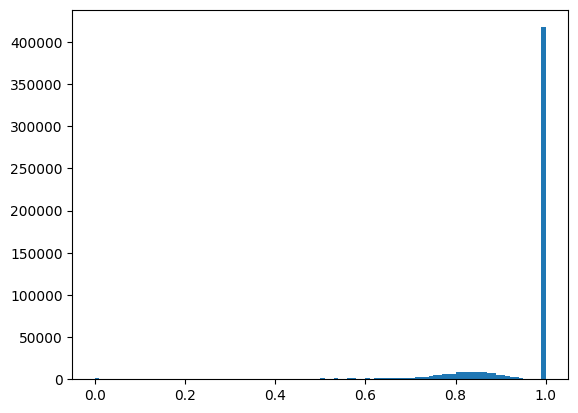

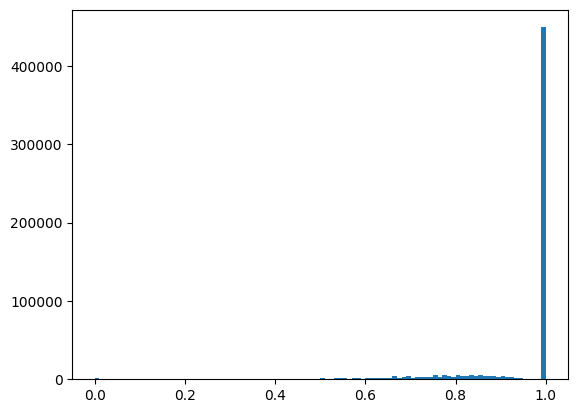

In [29]:
#load the results
import pandas as pd
import numpy as np
import networkx as nx

#do a foldseek all v all on the nter and cter structures
nterm8 = foldseek2tree.runFoldseek_allvall_EZsearch(outfolder + 'nter_structs/', outfolder + 'nter_allvall.m8' , foldseekpath = '../foldseek/foldseek')
cterm8 = foldseek2tree.runFoldseek_allvall_EZsearch(outfolder + 'cter_structs/', outfolder + 'cter_allvall.m8' , foldseekpath = '../foldseek/foldseek' )

#load the results
nter = pd.read_table(outfolder + 'nter_allvall.m8' , header = None )
cter = pd.read_table(outfolder + 'cter_allvall.m8' , header = None )

# make a distmat using the foldseek results
def res2distmat(ter):
    ter.columns = 'query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,lddt,lddtfull,alntmscore'.split(',')
    termat = np.zeros( (len(ter['query'].unique()), len(ter['query'].unique())) )
    ids = { j: i for i,j in enumerate(ter['query'].unique())}
    for idx,row in ter.iterrows():
        termat[ids[row['query']] , ids[row['target']]] += row['fident']
        termat[ids[row['target']] , ids[row['query']]] += row['fident']
    termat /= 2
    return 1-termat
ctermat = res2distmat(cter)
ntermat = res2distmat(nter)

plt.hist( ctermat.flatten() , bins = 100)
plt.show()
plt.hist( ntermat.flatten() , bins = 100)
plt.show()


In [30]:
#thresh the matrices between .4 and .99
ctermat[ctermat < .75] = 0
ctermat[ctermat > .99] = 0
ntermat[ntermat < .75] = 0
ntermat[ntermat > .99] = 0

[{3}, {8}, {22}, {51}, {169}, {185}, {191}, {202}, {217}, {11, 270, 657, 82, 533, 277, 152, 30, 543, 482, 294, 745, 750, 627, 377, 59}, {234}, {243}, {304}, {4, 7, 9, 10, 12, 13, 14, 15, 19, 20, 23, 24, 25, 29, 31, 35, 36, 38, 40, 42, 43, 44, 46, 56, 60, 64, 71, 75, 76, 78, 79, 81, 85, 86, 87, 88, 90, 91, 92, 97, 102, 104, 105, 108, 110, 113, 114, 115, 117, 118, 119, 123, 124, 125, 126, 128, 131, 132, 134, 135, 136, 138, 139, 141, 142, 143, 150, 151, 153, 154, 155, 162, 163, 165, 167, 172, 173, 174, 177, 180, 181, 182, 188, 190, 193, 195, 196, 197, 207, 210, 212, 213, 215, 216, 222, 225, 226, 227, 228, 229, 230, 231, 235, 237, 238, 240, 241, 242, 244, 245, 246, 247, 248, 250, 254, 257, 259, 261, 262, 267, 268, 269, 272, 274, 278, 280, 282, 285, 288, 289, 291, 292, 296, 297, 298, 300, 301, 302, 307, 308, 310, 313, 314, 315, 316, 317, 323, 326, 328, 329, 331, 332, 333, 334, 335, 336, 337, 340, 341, 344, 346, 349, 350, 356, 357, 358, 359, 360, 362, 363, 365, 366, 368, 369, 370, 372, 374, 

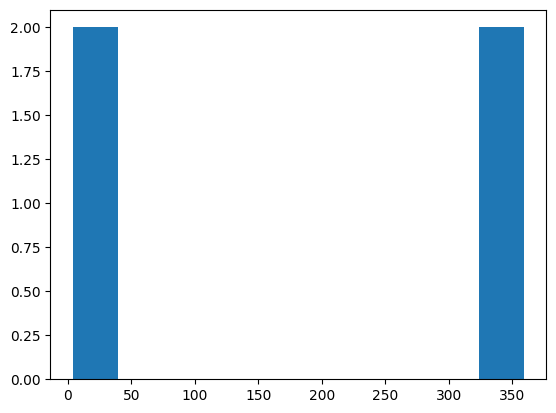

[478, 5, 280]


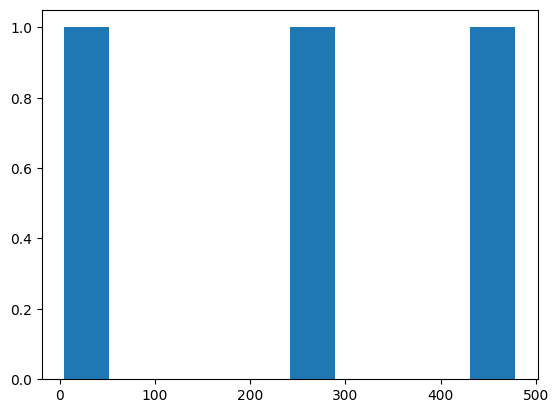

In [41]:

#make a networkx graph
cterG = nx.from_numpy_array(ctermat)
nterG = nx.from_numpy_array(ntermat)
Ccommunities = nx.community.louvain_communities(cterG)
print(Ccommunities)
Ncommunities = nx.community.louvain_communities(nterG)

#print the number of connected components
print('nter components: ' + str(len(Ncommunities)))
print('cter components: ' + str(len(Ncommunities)))

print([ len(i) for i in Ccommunities if len(i)> 1] )
plt.hist( [ len(i) for i in Ccommunities if len(i)> 1 ] , bins = 10)
plt.show()

print([ len(i) for i in Ncommunities if len(i)> 1] )
plt.hist( [ len(i) for i in Ncommunities if len(i)> 1  ] , bins = 10)
plt.show()

#add a community attribute to each node in the graph
for i in range(len(Ccommunities)):
    if len(Ccommunities[i]) == 1:
        cterG.nodes[list(Ccommunities[i])[0]]['community'] = -1
    else:
        for j in Ccommunities[i]:
            cterG.nodes[j]['community'] = i
for i in range(len(Ncommunities)):  
    if len(Ncommunities[i]) == 1:
        nterG.nodes[list(Ncommunities[i])[0]]['community'] = -1
    else:
        for j in Ncommunities[i]:
            nterG.nodes[j]['community'] = i


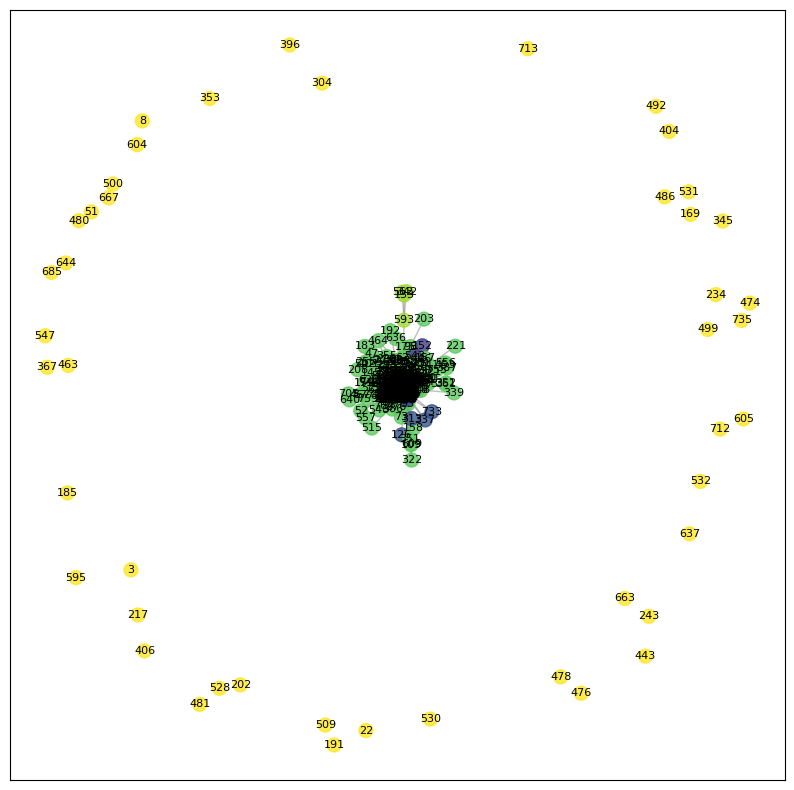

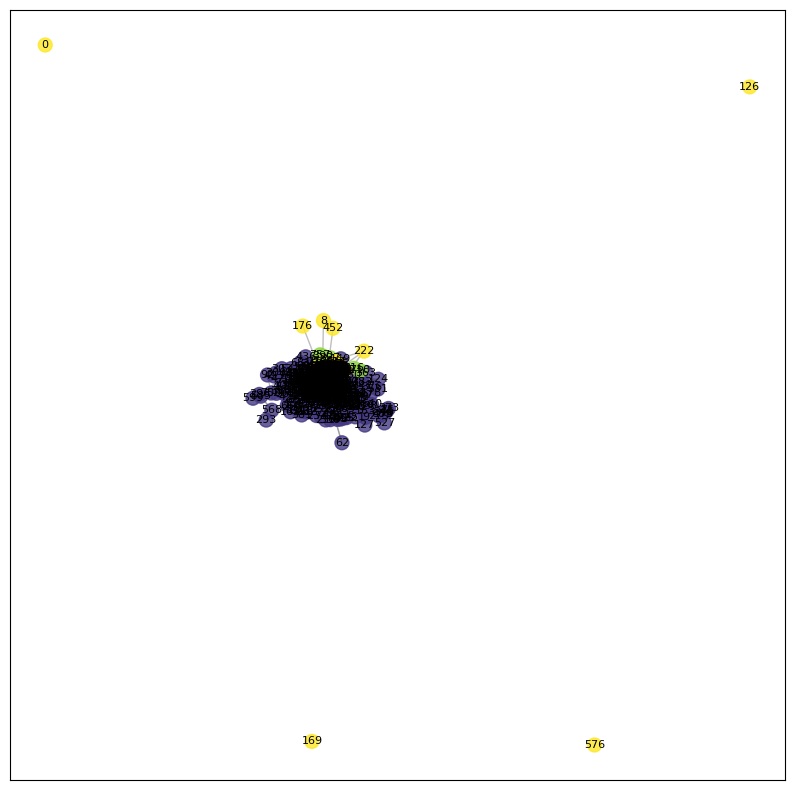

In [42]:
#plot networkx graphs with communities as different colors
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def plot_communities(G, communities, pos, ax, node_size=100, node_color='blue', edge_color='gray', edge_alpha=0.5, node_alpha=0.8, with_labels=True):
    """
    Plots the graph G with the communities as different colors.
    """
    # set the colors of each node. The communities are the keys in the dictionary
    # and the value is a list with all the nodes that belong to that community
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, len(communities))]

    # assign a color to each node based on the community it belongs to
    node_colors = [colors[G.nodes[node]['community']] for node in G.nodes()]
    # draw the graph nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_size, alpha=node_alpha, node_color=node_colors)
    # draw the graph edges
    nx.draw_networkx_edges(G, pos, ax=ax, width=1.0, alpha=edge_alpha, edge_color=edge_color)
    # draw the node labels
    if with_labels:
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)
    return ax

# plot the graph with the communities
fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_communities(cterG, Ccommunities, nx.spring_layout(cterG), ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_communities(nterG, Ncommunities, nx.spring_layout(nterG), ax)
plt.show()
